In [1]:
# IMPLEMENTACION DE Synthetic Minority Oversampling Technique (SMOTE)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from imblearn.over_sampling import  RandomOverSampler, SMOTE, ADASYN
%matplotlib inline
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [2]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Over-sampling variables target

## Variable Target

In [4]:
# Preparamos variable Target para entrenar los algoritmos
X= df.drop(["Target","Type","Failure_Type"], axis=1) 
y= df["Target"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy=0.5)
# resampling X, y
X_ros_Target, y_ros_Target = ros.fit_resample(X, y)
# new class distribution 
y_ros_Target.value_counts()
X_ros_Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14491 non-null  float64
 1   Process_temperature_[K]  14491 non-null  float64
 2   Rotational_speed_[rpm]   14491 non-null  int64  
 3   Torque_[Nm]              14491 non-null  float64
 4   Tool_wear_[min]          14491 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 566.2 KB


## Variable Failure_Type

In [5]:
# Preparamos variable Target para entrenar los algoritmos.
X= df.drop(["Type","Failure_Type"], axis=1) 
y= df["Failure_Type"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy={"Heat Dissipation Failure":1000,"Random Failures":1000,"Tool Wear Failure":1000,
                                            "Overstrain Failure":1000, "Power Failure":1000})
# resampling X, y
X_ros_failure, y_ros_failure = ros.fit_resample(X, y)
y_ros_failure.value_counts()
X_ros_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14652 non-null  float64
 1   Process_temperature_[K]  14652 non-null  float64
 2   Rotational_speed_[rpm]   14652 non-null  int64  
 3   Torque_[Nm]              14652 non-null  float64
 4   Tool_wear_[min]          14652 non-null  int64  
 5   Target                   14652 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 686.9 KB


# TREE CLASIFIER

In [29]:
                        ###############################################
                        ## Implementacion de Decision Tree Clasifier ##
                        ###############################################
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


## Variable Target

Deberia modificar la variable Type con valores STR para utilizarlo dentro del TREE?

% de aciertos sobre el set de entrenamiento: 0.9690842591953627
% de aciertos sobre el set de evaluación: 0.9693


C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


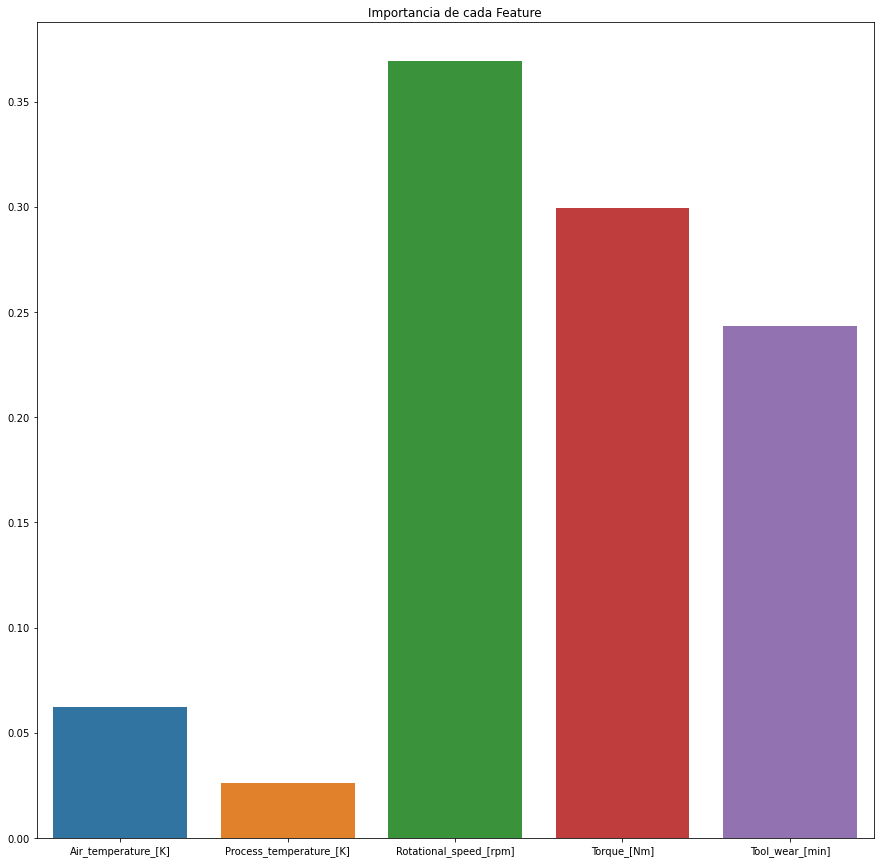

In [36]:
                        #####################
                        ## Variable Target ##
                        #####################
                        
X_target_test= df.drop(["Target","Type","Failure_Type"], axis=1) 
y_target_test= df["Target"]
#Creamos el modelo
tree = DecisionTreeClassifier(max_depth=8, random_state = 42)
#Entrenamos el algoritmo
tree.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train
y_train_pred = tree.predict(X_ros_Target)
# Prediccion en Test
y_test_pred = tree.predict(X_target_test)
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_target_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X_target_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## Variable Failure_Type

% de aciertos sobre el set de entrenamiento: 0.9746109746109746
% de aciertos sobre el set de evaluación: 0.9943


C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


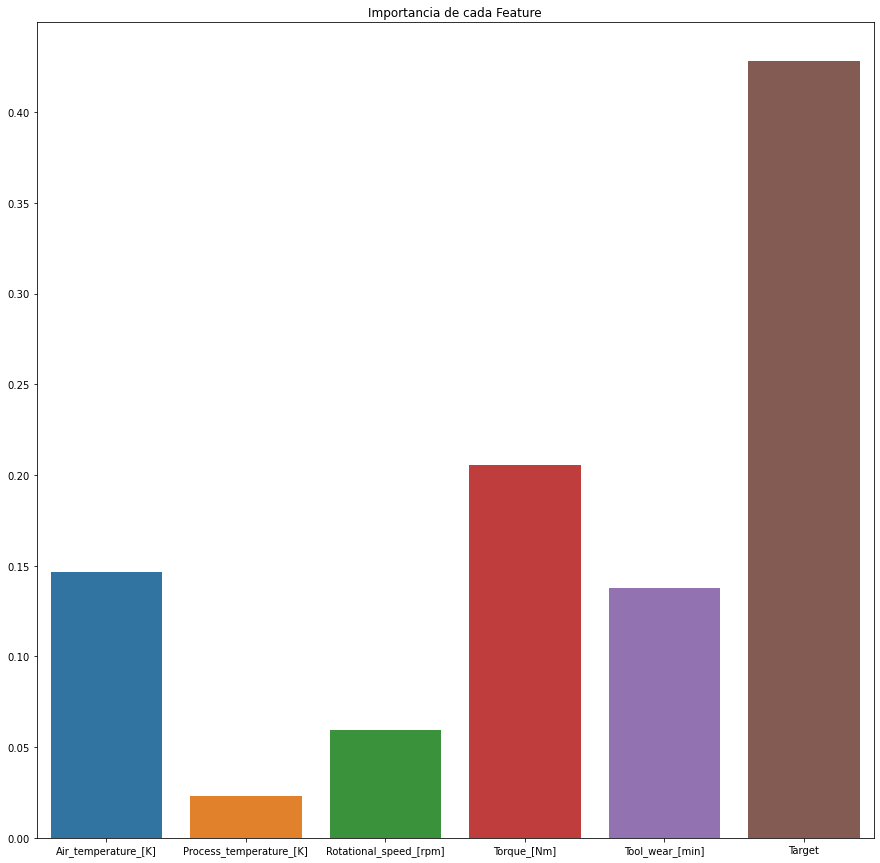

In [37]:
                        ###########################
                        ## Variable Failure_Type ##
                        ###########################
                        
X_failure_test= df.drop(["Type","Failure_Type"], axis=1) 
y_failure_test= df["Failure_Type"]
#Creamos el modelo
tree_2 = DecisionTreeClassifier(max_depth=8, random_state = 42)
#Entrenamos el algoritmo
tree.fit(X_ros_failure, y_ros_failure)
# Prediccion en Train
y_train_pred = tree.predict(X_ros_failure)
# Prediccion en Test
y_test_pred = tree.predict(X_failure_test)
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_failure, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_failure_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X_failure_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

# RANDOM FOREST

## Variable Target

In [22]:
                    #####################################
                    ## Implementacion de Random Forest ##
                    #####################################
from sklearn.ensemble import RandomForestClassifier

# Variable Target

# Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train (OVERSAMPLING)
y_train_pred = model.predict(X_ros_Target)
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)

#Prediccion en Test (ORIGINAL)
y_test_pred = model.predict(X_target_test) 
test_accuracy = accuracy_score(y_target_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 1.0
% de aciertos sobre el set de evaluación: 1.0


## Variable Failure_Type

In [35]:
# Variable Failure_Type
# Creamos un random forest!
model = RandomForestClassifier(random_state=11,
                               n_estimators=200,
                               class_weight="balanced", 
                               max_features="log2",
                               max_depth=8)
model.fit(X_ros_failure, y_ros_failure)
# Prediccion en Train
y_train_pred = model.predict(X_ros_failure) 
train_accuracy = accuracy_score(y_ros_failure, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
# Prediccion en Test
y_test_pred = model.predict(X_failure_test) 
test_accuracy = accuracy_score(y_failure_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9658067158067158
% de aciertos sobre el set de evaluación: 0.9499
